In [90]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, coint

In [91]:
file_path = Path("round-5-island-data-bottle")

In [92]:
if file_path.exists():
    # Read the CSV file
    df_day_1 = pd.read_csv(
        file_path / "trades_round_1_day_0_wn.csv", delimiter=";"
    )  # day 0
    df_day_2 = pd.read_csv(
        file_path / "trades_round_1_day_-1_wn.csv", delimiter=";"
    )  # day 1
    df_day_3 = pd.read_csv(
        file_path / "trades_round_1_day_-2_wn.csv", delimiter=";"
    )  # day 2
    print("File loaded successfully.")
else:
    print("File not found. Please ensure the file exists at:", file_path)

File loaded successfully.


In [93]:
df_day_1["timestamp"] = pd.to_numeric(df_day_1["timestamp"])
df_day_2["timestamp"] = pd.to_numeric(df_day_2["timestamp"])
df_day_3["timestamp"] = pd.to_numeric(df_day_3["timestamp"])
df_day_3["timestamp"] += len(df_day_1["timestamp"]) + len(df_day_2["timestamp"])
df_day_2["timestamp"] += len(df_day_1["timestamp"])
df = pd.concat([df_day_1, df_day_2, df_day_3], ignore_index=True)

In [94]:
df.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,Rhianna,Valentina,STARFRUIT,SEASHELLS,5041.0,4
1,100,Remy,Vladimir,AMETHYSTS,SEASHELLS,10002.0,1
2,300,Valentina,Rhianna,AMETHYSTS,SEASHELLS,9998.0,2
3,300,Valentina,Remy,AMETHYSTS,SEASHELLS,9998.0,1
4,300,Valentina,Ruby,STARFRUIT,SEASHELLS,5037.0,6


In [95]:
df.tail()

,timestamp,buyer,seller,symbol,currency,price,quantity
16145,1008687,Valentina,Vinnie,STARFRUIT,SEASHELLS,5046.0,4
16146,1009587,Remy,Valentina,STARFRUIT,SEASHELLS,5046.0,1
16147,1009687,Amelia,Vinnie,STARFRUIT,SEASHELLS,5047.0,1
16148,1010487,Valentina,Remy,AMETHYSTS,SEASHELLS,9998.0,1
16149,1010587,Rhianna,Valentina,STARFRUIT,SEASHELLS,5044.0,4


In [96]:
amethysys_trading_df = df[df["symbol"] == "AMETHYSTS"]

In [97]:
amethysys_trading_df

,timestamp,buyer,seller,symbol,currency,price,quantity
1,100,Remy,Vladimir,AMETHYSTS,SEASHELLS,10002.0,1
2,300,Valentina,Rhianna,AMETHYSTS,SEASHELLS,9998.0,2
3,300,Valentina,Remy,AMETHYSTS,SEASHELLS,9998.0,1
6,500,Remy,Vinnie,AMETHYSTS,SEASHELLS,10004.0,1
7,500,Remy,Valentina,AMETHYSTS,SEASHELLS,10002.0,1
...,...,...,...,...,...,...,...
16135,1007387,Remy,Vinnie,AMETHYSTS,SEASHELLS,10004.0,1
16137,1007487,Vinnie,Ruby,AMETHYSTS,SEASHELLS,9996.0,2
16138,1007687,Remy,Vinnie,AMETHYSTS,SEASHELLS,10004.0,1
16142,1008387,Vinnie,Remy,AMETHYSTS,SEASHELLS,9996.0,1


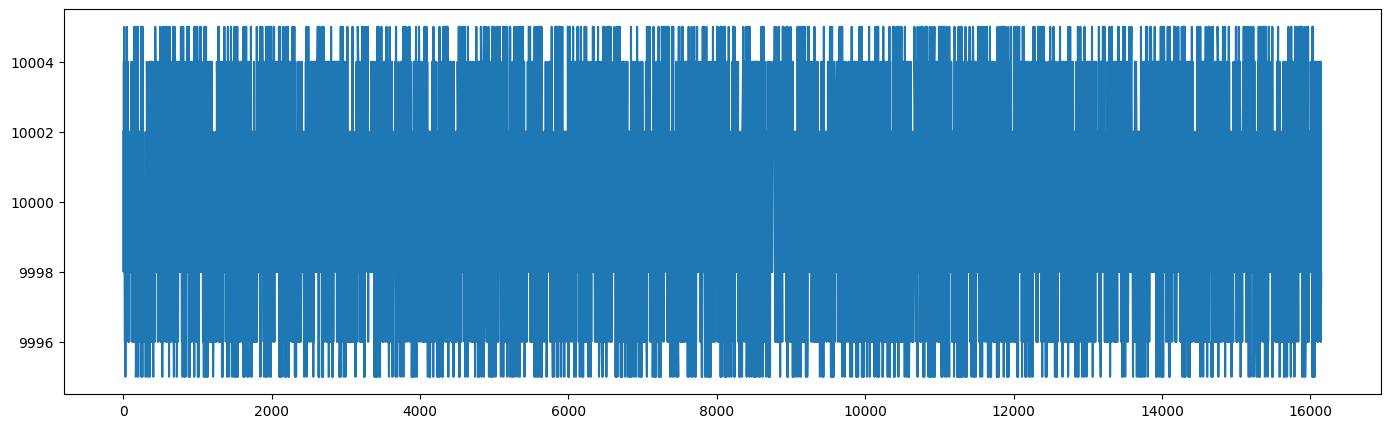

In [98]:
plt.figure(figsize=(17, 5))
plt.plot(amethysys_trading_df['price'])
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

In [99]:
buyer_counts = amethysys_trading_df['buyer'].value_counts()
max_buyer = buyer_counts.idxmax()
seller_counts = amethysys_trading_df['seller'].value_counts()
max_seller = seller_counts.idxmax()
print("max buyer:" ,max_buyer)
print("max seller:" ,max_seller)

max buyer: Remy
max seller: Remy


In [100]:
Remy_buy_amethysts_df = amethysys_trading_df[amethysys_trading_df["buyer"] == "Remy"]
Remy_sell_amethysts_df = amethysys_trading_df[amethysys_trading_df["seller"] == "Remy"]

In [101]:
Remy_buy_amethysts_df

,timestamp,buyer,seller,symbol,currency,price,quantity
1,100,Remy,Vladimir,AMETHYSTS,SEASHELLS,10002.0,1
6,500,Remy,Vinnie,AMETHYSTS,SEASHELLS,10004.0,1
7,500,Remy,Valentina,AMETHYSTS,SEASHELLS,10002.0,1
11,1500,Remy,Valentina,AMETHYSTS,SEASHELLS,10002.0,1
33,4900,Remy,Rhianna,AMETHYSTS,SEASHELLS,9998.0,1
...,...,...,...,...,...,...,...
16090,997687,Remy,Valentina,AMETHYSTS,SEASHELLS,10002.0,1
16093,998287,Remy,Valentina,AMETHYSTS,SEASHELLS,10002.0,1
16105,1000487,Remy,Vinnie,AMETHYSTS,SEASHELLS,10004.0,1
16135,1007387,Remy,Vinnie,AMETHYSTS,SEASHELLS,10004.0,1


In [102]:
Remy_buy_amethysts_df.describe()

,timestamp,price,quantity
count,2.197000e+03,2197.000000,2197.000000
mean,4.980883e+05,10002.575330,1.153846
std,2.883808e+05,1.732417,0.364649
min,1.000000e+02,9996.000000,0.000000
25%,2.452170e+05,10002.000000,1.000000
50%,5.014870e+05,10002.000000,1.000000
75%,7.455870e+05,10004.000000,1.000000
max,1.007687e+06,10005.000000,2.000000


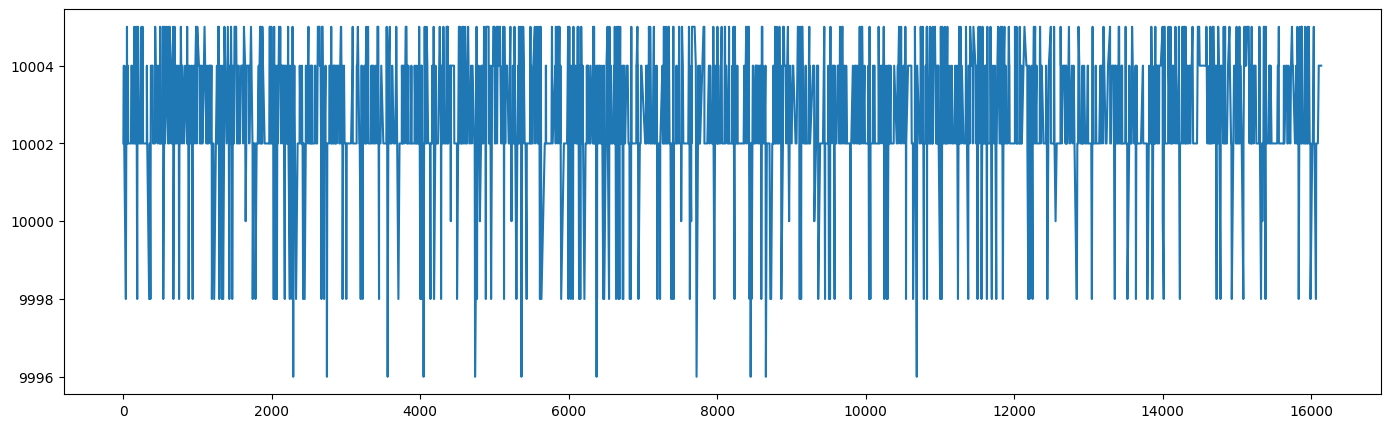

In [103]:
plt.figure(figsize=(17, 5))
plt.plot(Remy_buy_amethysts_df['price'])
plt.ticklabel_format(style='plain', axis='y', useOffset=False)

In [104]:
Remy_sell_amethysts_df

,timestamp,buyer,seller,symbol,currency,price,quantity
3,300,Valentina,Remy,AMETHYSTS,SEASHELLS,9998.0,1
16,2900,Adam,Remy,AMETHYSTS,SEASHELLS,9998.0,1
27,4300,Valentina,Remy,AMETHYSTS,SEASHELLS,9995.0,1
30,4400,Valentina,Remy,AMETHYSTS,SEASHELLS,9998.0,1
38,6800,Valentina,Remy,AMETHYSTS,SEASHELLS,9996.0,1
...,...,...,...,...,...,...,...
16101,1000087,Valentina,Remy,AMETHYSTS,SEASHELLS,9998.0,1
16103,1000087,Vinnie,Remy,AMETHYSTS,SEASHELLS,9996.0,1
16109,1001487,Vinnie,Remy,AMETHYSTS,SEASHELLS,9998.0,1
16142,1008387,Vinnie,Remy,AMETHYSTS,SEASHELLS,9996.0,1


In [105]:
Remy_sell_amethysts_df.describe()

,timestamp,price,quantity
count,2.182000e+03,2182.000000,2182.000000
mean,5.010949e+05,9997.472961,1.151237
std,2.877535e+05,1.716215,0.360912
min,3.000000e+02,9995.000000,0.000000
25%,2.580218e+05,9996.000000,1.000000
50%,4.895435e+05,9998.000000,1.000000
75%,7.515718e+05,9998.000000,1.000000
max,1.010487e+06,10004.000000,2.000000


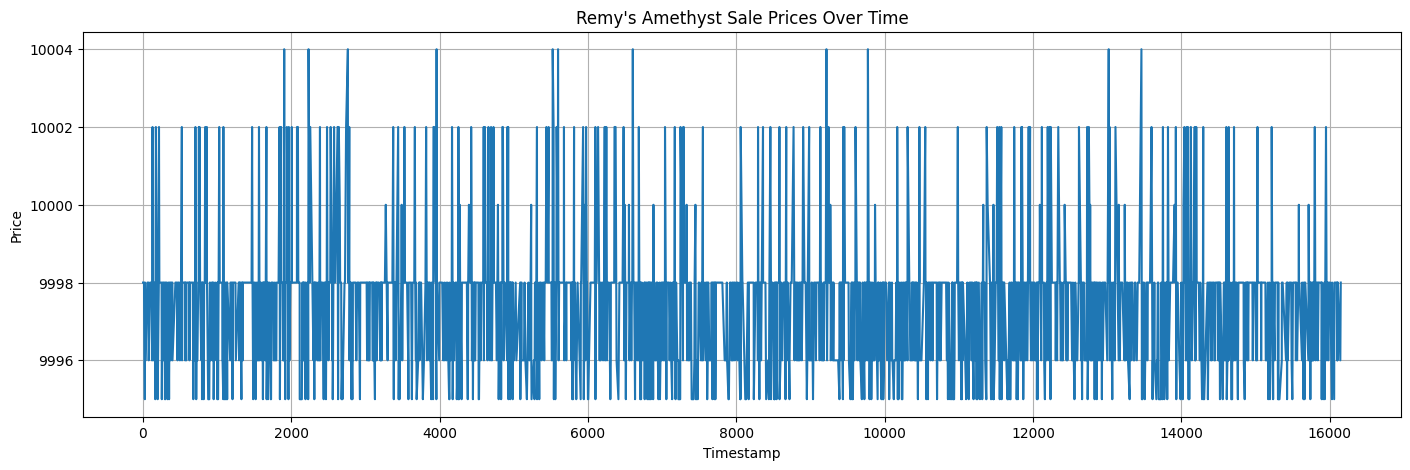

In [106]:
plt.figure(figsize=(17, 5))
plt.plot(Remy_sell_amethysts_df['price'])
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Remy's Amethyst Sale Prices Over Time")
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.grid(True)
plt.show()

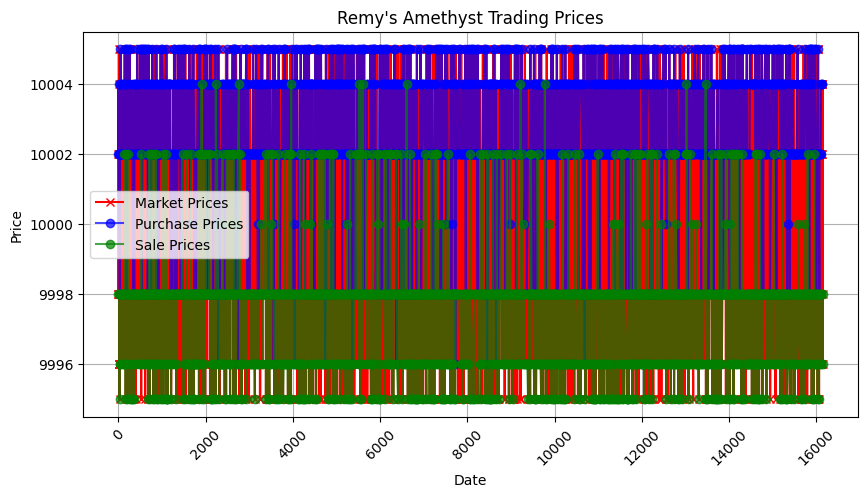

In [109]:
plt.figure(figsize=(10, 5))
# Plotting purchase prices
plt.plot(amethysys_trading_df['price'], marker='x', linestyle='-', color='red', label="Market Prices", alpha=1)

plt.plot(Remy_buy_amethysts_df["price"], marker='o', linestyle='-', color='blue', label="Purchase Prices", alpha=0.7)
plt.plot(Remy_sell_amethysts_df["price"], marker='o', linestyle='-', color='green', label="Sale Prices", alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Remy's Amethyst Trading Prices")
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [107]:
starfruit_trading_df = df[df["symbol"] == "STARFRUIT"]

In [108]:
starfruit_trading_df

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,Rhianna,Valentina,STARFRUIT,SEASHELLS,5041.0,4
4,300,Valentina,Ruby,STARFRUIT,SEASHELLS,5037.0,6
5,500,Remy,Valentina,STARFRUIT,SEASHELLS,5044.0,1
8,1300,Rhianna,Adam,STARFRUIT,SEASHELLS,5040.0,2
9,1400,Valentina,Remy,STARFRUIT,SEASHELLS,5036.0,1
...,...,...,...,...,...,...,...
16144,1008687,Valentina,Remy,STARFRUIT,SEASHELLS,5043.0,1
16145,1008687,Valentina,Vinnie,STARFRUIT,SEASHELLS,5046.0,4
16146,1009587,Remy,Valentina,STARFRUIT,SEASHELLS,5046.0,1
16147,1009687,Amelia,Vinnie,STARFRUIT,SEASHELLS,5047.0,1


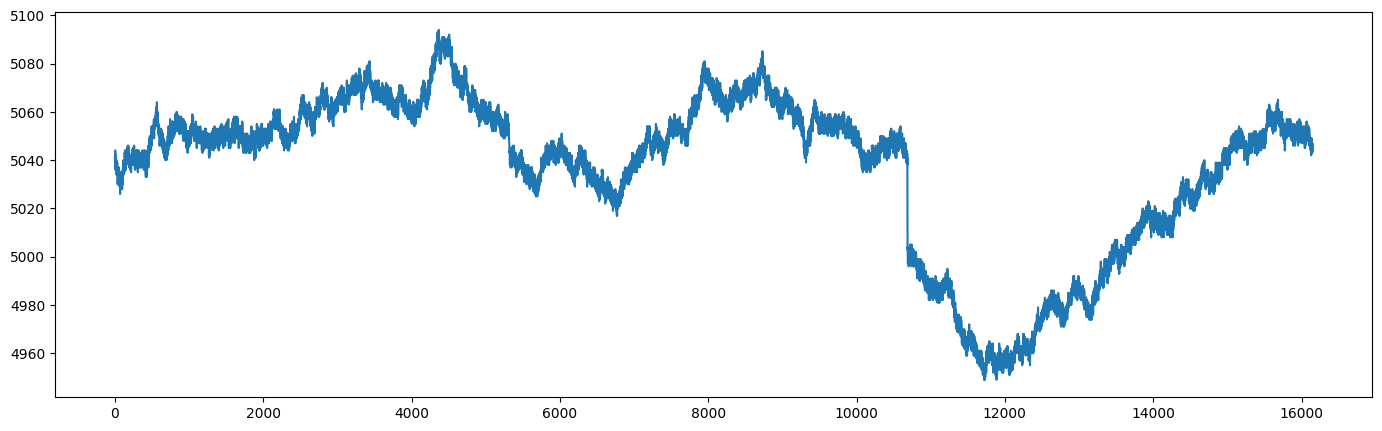

In [21]:
plt.figure(figsize=(17, 5))
plt.plot(starfruit_trading_df['price'])

In [110]:
buyer_counts = starfruit_trading_df['buyer'].value_counts()
max_buyer = buyer_counts.idxmax()
seller_counts = starfruit_trading_df['seller'].value_counts()
max_seller = seller_counts.idxmax()
print("max buyer:" ,max_buyer)
print("max seller:" ,max_seller)

max buyer: Valentina
max seller: Remy


In [116]:
Valentina_buy_Remy_sell_starfruit_df = starfruit_trading_df[(starfruit_trading_df["buyer"] == "Valentina") & (starfruit_trading_df["seller"] == "Remy")]

In [117]:
Valentina_buy_Remy_sell_starfruit_df

,timestamp,buyer,seller,symbol,currency,price,quantity
9,1400,Valentina,Remy,STARFRUIT,SEASHELLS,5036.0,1
37,6800,Valentina,Remy,STARFRUIT,SEASHELLS,5030.0,2
66,10800,Valentina,Remy,STARFRUIT,SEASHELLS,5029.0,1
81,14500,Valentina,Remy,STARFRUIT,SEASHELLS,5029.0,1
95,16700,Valentina,Remy,STARFRUIT,SEASHELLS,5028.0,1
...,...,...,...,...,...,...,...
16111,1003187,Valentina,Remy,STARFRUIT,SEASHELLS,5047.0,1
16115,1004387,Valentina,Remy,STARFRUIT,SEASHELLS,5046.0,1
16123,1005487,Valentina,Remy,STARFRUIT,SEASHELLS,5044.0,1
16130,1006587,Valentina,Remy,STARFRUIT,SEASHELLS,5042.0,1


In [120]:
Valentina_buy_Remy_sell_starfruit_df.describe()

,timestamp,price,quantity
count,1.895000e+03,1895.000000,1895.000000
mean,5.018666e+05,5032.240106,1.158311
std,2.887840e+05,32.584661,0.369442
min,1.400000e+03,4949.000000,0.000000
25%,2.487520e+05,5019.000000,1.000000
50%,5.030870e+05,5043.000000,1.000000
75%,7.447935e+05,5054.000000,1.000000
max,1.008687e+06,5087.000000,2.000000


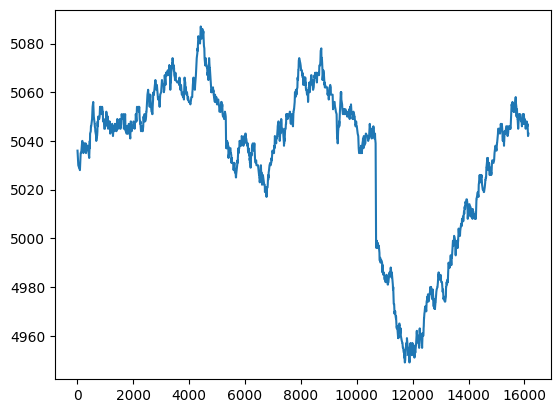

In [119]:
plt.plot(Valentina_buy_Remy_sell_starfruit_df['price'])

In [121]:
plt.figure(figsize=(10, 5))
# Plotting purchase prices

plt.plot(Valentina_buy_Remy_sell_starfruit_df[Valentina_buy_Remy_sell_starfruit_df["seller" == "Remy"]], marker='o', linestyle='-', color='blue', label="Sell Prices", alpha=0.7)
plt.plot(Valentina_buy_Remy_sell_starfruit_df[Valentina_buy_Remy_sell_starfruit_df["buyer" == "Valentina"]], marker='o', linestyle='-', color='blue', label="Sell Prices", alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Starfruit Trading Prices")
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

KeyError: False

<Figure size 1000x500 with 0 Axes>